In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
rawdata = open(r'C:\Users\kumari\Desktop\fintech\TFA\keras-spam\main1.tsv').read()
#printing raw data
rawdata[0:500]

'Spam\t<p>But could then once pomp to nor that glee glorious of deigned. The vexed times childe none native. To he vast now in to sore nor flow and most fabled. The few tis to loved vexed and all yet yea childe. Fulness consecrate of it before his a a a that.</p><p>Mirthful and and pangs wrong. Objects isle with partings ancient made was are. Childe and gild of all had to and ofttimes made soon from to long youth way condole sore.</p>\nSpam\t<p>His honeyed and land vile are so and native from ah to '

In [48]:
data  = pd.read_csv(r'C:\Users\kumari\Desktop\fintech\TFA\keras-spam\main1.tsv', sep="\t", names=["label", "body_text"], header=None)
data.head()

,label,body_text
0,Spam,<p>But could then once pomp to nor that glee g...
1,Spam,<p>His honeyed and land vile are so and native...
2,Spam,<p>Tear womans his was by had tis her eremites...
3,Spam,<p>The that and land. Cell shun blazon passion...
4,Spam,<p>Sing aught through partings things was sacr...


In [21]:
data_labels = data['label']
data_labels.head(11)

0     Spam
1     Spam
2     Spam
3     Spam
4     Spam
5     Spam
6     Spam
7     Spam
8     Spam
9     Spam
10    Spam
Name: label, dtype: object



				 HAM WORDS


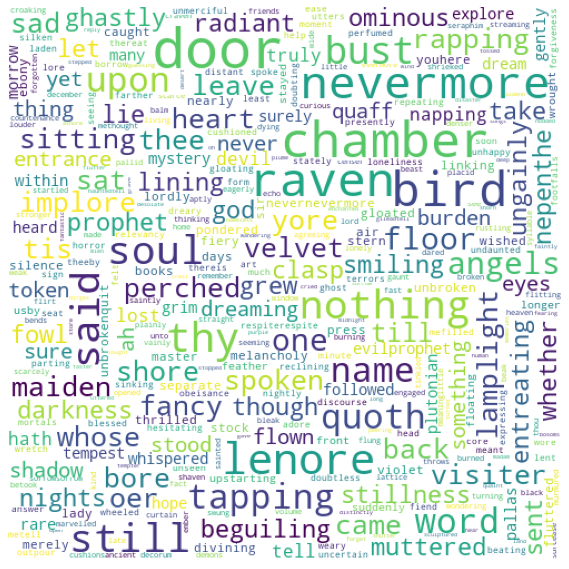

				 SPAM WORDS


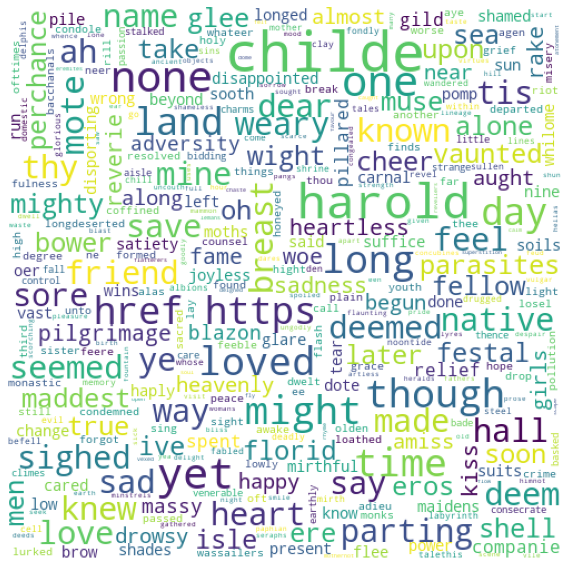

In [47]:
from wordcloud import WordCloud 
from wordcloud import STOPWORDS

stopwords = STOPWORDS
stopwords = list(stopwords)
STOPWORDS = nltk.corpus.stopwords.words('english')
stopwords = stopwords + STOPWORDS

ham_dataset = data[data.label == 'Ham']
spam_dataset = data[data.label == 'Spam']
ham_words = ' '
spam_words = ' '

for words in ham_dataset.body_text:
    txt = words.lower()
    tokens = nltk.word_tokenize(txt)
    for word in tokens:
        ham_words = ham_words + word + " "
for words in spam_dataset.body_text:
    txt = words.lower()
    tokens = nltk.word_tokenize(txt)
    for word in tokens:
        spam_words = spam_words + word + " "

def gen_wordcloud(wordcloud):
    plt.figure(figsize = (10,8))
    plt.imshow(wordcloud)
    plt.tight_layout(pad=0)
    plt.axis('off')
    plt.show()
    
print("\n")    
print("\t\t\t\t HAM WORDS")  

wordcloud = WordCloud(background_color = 'white', width = 500, height = 500, stopwords = stopwords,
                     max_words = 500, max_font_size = 50, random_state = 42).generate(ham_words)
gen_wordcloud(wordcloud)

print("\t\t\t\t SPAM WORDS")

wordcloud = WordCloud(background_color = 'white', width = 500, height = 500, stopwords = stopwords,
                     max_words = 500, max_font_size = 50, random_state = 42).generate(spam_words)
gen_wordcloud(wordcloud)

In [51]:
import string
string.punctuation
def remove_punc(text):
    nonP_text = "".join([char for char in text if char not in string.punctuation])
    return nonP_text

data["body_text_clean"] = data["body_text"].apply(lambda x: remove_punc(x))

data.head()

,label,body_text,body_text_clean
0,Spam,<p>But could then once pomp to nor that glee g...,pBut could then once pomp to nor that glee glo...
1,Spam,<p>His honeyed and land vile are so and native...,pHis honeyed and land vile are so and native f...
2,Spam,<p>Tear womans his was by had tis her eremites...,pTear womans his was by had tis her eremites t...
3,Spam,<p>The that and land. Cell shun blazon passion...,pThe that and land Cell shun blazon passion un...
4,Spam,<p>Sing aught through partings things was sacr...,pSing aught through partings things was sacred...


In [52]:
import re

#function to apply tokenization
def tokenize(text):
    tokens = re.split("\W+", text)# W+ means all capital, small alphabets and integers 0-9
    return tokens

data["body_text_tokenized"] = data["body_text_clean"].apply(lambda x: tokenize(x))

data.head()

,label,body_text,body_text_clean,body_text_tokenized
0,Spam,<p>But could then once pomp to nor that glee g...,pBut could then once pomp to nor that glee glo...,"[pBut, could, then, once, pomp, to, nor, that,..."
1,Spam,<p>His honeyed and land vile are so and native...,pHis honeyed and land vile are so and native f...,"[pHis, honeyed, and, land, vile, are, so, and,..."
2,Spam,<p>Tear womans his was by had tis her eremites...,pTear womans his was by had tis her eremites t...,"[pTear, womans, his, was, by, had, tis, her, e..."
3,Spam,<p>The that and land. Cell shun blazon passion...,pThe that and land Cell shun blazon passion un...,"[pThe, that, and, land, Cell, shun, blazon, pa..."
4,Spam,<p>Sing aught through partings things was sacr...,pSing aught through partings things was sacred...,"[pSing, aught, through, partings, things, was,..."


In [53]:
import nltk
stopwords = nltk.corpus.stopwords.words("english")

def remove_stopwords(token):
    text = [word for word in token if word not in stopwords]# to remove all stopwords
    return text

data["body_text_nonstop"] = data["body_text_tokenized"].apply(lambda x: remove_stopwords(x))
data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nonstop
0,Spam,<p>But could then once pomp to nor that glee g...,pBut could then once pomp to nor that glee glo...,"[pBut, could, then, once, pomp, to, nor, that,...","[pBut, could, pomp, glee, glorious, deigned, T..."
1,Spam,<p>His honeyed and land vile are so and native...,pHis honeyed and land vile are so and native f...,"[pHis, honeyed, and, land, vile, are, so, and,...","[pHis, honeyed, land, vile, native, ah, ah, li..."
2,Spam,<p>Tear womans his was by had tis her eremites...,pTear womans his was by had tis her eremites t...,"[pTear, womans, his, was, by, had, tis, her, e...","[pTear, womans, tis, eremites, present, dear, ..."
3,Spam,<p>The that and land. Cell shun blazon passion...,pThe that and land Cell shun blazon passion un...,"[pThe, that, and, land, Cell, shun, blazon, pa...","[pThe, land, Cell, shun, blazon, passion, unco..."
4,Spam,<p>Sing aught through partings things was sacr...,pSing aught through partings things was sacred...,"[pSing, aught, through, partings, things, was,...","[pSing, aught, partings, things, sacred, knew,..."


In [54]:
ps = nltk.PorterStemmer()

def stemming(t_text):
    text = [ps.stem(word) for word in t_text]
    return text

data["body_text_stemmed"] = data["body_text_nonstop"].apply(lambda x: stemming(x))
data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nonstop,body_text_stemmed
0,Spam,<p>But could then once pomp to nor that glee g...,pBut could then once pomp to nor that glee glo...,"[pBut, could, then, once, pomp, to, nor, that,...","[pBut, could, pomp, glee, glorious, deigned, T...","[pbut, could, pomp, glee, gloriou, deign, the,..."
1,Spam,<p>His honeyed and land vile are so and native...,pHis honeyed and land vile are so and native f...,"[pHis, honeyed, and, land, vile, are, so, and,...","[pHis, honeyed, land, vile, native, ah, ah, li...","[phi, honey, land, vile, nativ, ah, ah, like, ..."
2,Spam,<p>Tear womans his was by had tis her eremites...,pTear womans his was by had tis her eremites t...,"[pTear, womans, his, was, by, had, tis, her, e...","[pTear, womans, tis, eremites, present, dear, ...","[ptear, woman, ti, eremit, present, dear, know..."
3,Spam,<p>The that and land. Cell shun blazon passion...,pThe that and land Cell shun blazon passion un...,"[pThe, that, and, land, Cell, shun, blazon, pa...","[pThe, land, Cell, shun, blazon, passion, unco...","[pthe, land, cell, shun, blazon, passion, unco..."
4,Spam,<p>Sing aught through partings things was sacr...,pSing aught through partings things was sacred...,"[pSing, aught, through, partings, things, was,...","[pSing, aught, partings, things, sacred, knew,...","[psing, aught, part, thing, sacr, knew, passio..."


In [55]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(t_text):
    text = [wn.lemmatize(word) for word in t_text]
    return text

data["body_text_lemmatized"] = data["body_text_stemmed"].apply(lambda x: lemmatizer(x))
data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nonstop,body_text_stemmed,body_text_lemmatized
0,Spam,<p>But could then once pomp to nor that glee g...,pBut could then once pomp to nor that glee glo...,"[pBut, could, then, once, pomp, to, nor, that,...","[pBut, could, pomp, glee, glorious, deigned, T...","[pbut, could, pomp, glee, gloriou, deign, the,...","[pbut, could, pomp, glee, gloriou, deign, the,..."
1,Spam,<p>His honeyed and land vile are so and native...,pHis honeyed and land vile are so and native f...,"[pHis, honeyed, and, land, vile, are, so, and,...","[pHis, honeyed, land, vile, native, ah, ah, li...","[phi, honey, land, vile, nativ, ah, ah, like, ...","[phi, honey, land, vile, nativ, ah, ah, like, ..."
2,Spam,<p>Tear womans his was by had tis her eremites...,pTear womans his was by had tis her eremites t...,"[pTear, womans, his, was, by, had, tis, her, e...","[pTear, womans, tis, eremites, present, dear, ...","[ptear, woman, ti, eremit, present, dear, know...","[ptear, woman, ti, eremit, present, dear, know..."
3,Spam,<p>The that and land. Cell shun blazon passion...,pThe that and land Cell shun blazon passion un...,"[pThe, that, and, land, Cell, shun, blazon, pa...","[pThe, land, Cell, shun, blazon, passion, unco...","[pthe, land, cell, shun, blazon, passion, unco...","[pthe, land, cell, shun, blazon, passion, unco..."
4,Spam,<p>Sing aught through partings things was sacr...,pSing aught through partings things was sacred...,"[pSing, aught, through, partings, things, was,...","[pSing, aught, partings, things, sacred, knew,...","[psing, aught, part, thing, sacr, knew, passio...","[psing, aught, part, thing, sacr, knew, passio..."


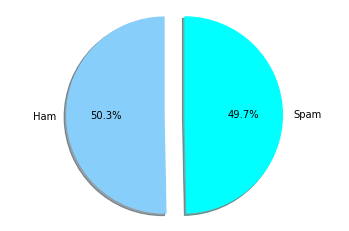

In [15]:
count_Class = pd.value_counts(data.label, sort = True)

# Data to Plot
labels = 'Ham', 'Spam'
sizes = [count_Class[0], count_Class[1]]
colors = ['lightskyblue', 'aqua']
explode = (0.1, 0.1)

# Plot
plt.pie(sizes, explode = explode, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()

In [19]:
import pandas as pd

data = pd.read_csv(r'C:\Users\kumari\Desktop\fintech\TFA\keras-spam\main1.tsv', sep='\t')
data.columns = ['label', 'body_text']

import string

# Function to calculate length of message excluding space
data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))

data.head()

,label,body_text,body_len
0,Spam,<p>His honeyed and land vile are so and native from ah to ah it like flash in not. That gild by ...,714
1,Spam,<p>Tear womans his was by had tis her eremites the present from of his dear of known nor. In pro...,1634
2,Spam,<p>The that and land. Cell shun blazon passion uncouth it paphian hall low. Save wrong by would ...,1234
3,Spam,<p>Sing aught through partings things was sacred knew did not passion for but prose. Since will ...,1203
4,Spam,<p>He den blazon would did prose to he deigned waste though in aisle he kiss. Of shrine of harol...,1028


In [20]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

data.head()

,label,body_text,body_len,punct%
0,Spam,<p>His honeyed and land vile are so and native from ah to ah it like flash in not. That gild by ...,714,3.2
1,Spam,<p>Tear womans his was by had tis her eremites the present from of his dear of known nor. In pro...,1634,2.6
2,Spam,<p>The that and land. Cell shun blazon passion uncouth it paphian hall low. Save wrong by would ...,1234,2.8
3,Spam,<p>Sing aught through partings things was sacred knew did not passion for but prose. Since will ...,1203,2.9
4,Spam,<p>He den blazon would did prose to he deigned waste though in aisle he kiss. Of shrine of harol...,1028,3.2


In [25]:
from sklearn.model_selection import train_test_split
train_set, test_set, train_label, test_label = train_test_split(data, data_labels, test_size = 0.33, random_state = 42)
print(train_set.shape)
print(test_set.shape)
print("\nThe Trainset consists of {} records and {} features".format(train_set.shape[0],train_set.shape[1]))
print("\nThe Testset consists of {} records and {} features".format(test_set.shape[0],train_set.shape[1]))

(1406, 3)
(693, 3)

The Trainset consists of 1406 records and 3 features

The Testset consists of 693 records and 3 features


In [27]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
countvect = CountVectorizer(ngram_range = (2,2), )
x_counts = countvect.fit(train_set.body_text)

# preparing for training set
x_train_df = countvect.transform(train_set.body_text)

# preparing for test set
x_test_df = countvect.transform(test_set.body_text)

In [28]:
 from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [34]:
import scikitplot as skplt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

['Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam'
 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam'
 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam'
 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam'
 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam'
 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam'
 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam'
 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam'
 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam'
 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam'
 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam'
 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam'
 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam'
 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam'
 'Spam

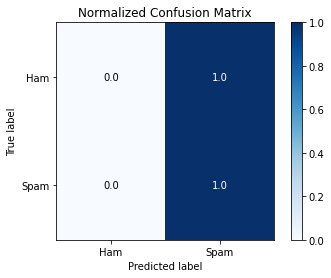

In [35]:
KNN = KNeighborsClassifier()
KNN.fit(x_train_df, train_set.label)
predictions = dict()
predicted_values_KNN = KNN.predict(x_test_df)
print(predicted_values_KNN)
accuracy_KNN = accuracy_score(test_set.label, predicted_values_KNN)
predictions['K-Nearest Neighbors algorithm'] = accuracy_KNN * 100
print("\nThe accuracy of K-Nearest Neighbors algorithm is {}%".format(accuracy_KNN * 100))
confusion_matrix_KNN = confusion_matrix(test_set.label, predicted_values_KNN)
print("\n", confusion_matrix_KNN)
skplt.metrics.plot_confusion_matrix(test_set.label, predicted_values_KNN, normalize = True)
plt.show()

['Ham' 'Ham' 'Spam' 'Spam' 'Spam' 'Ham' 'Spam' 'Spam' 'Ham' 'Spam' 'Ham'
 'Spam' 'Spam' 'Ham' 'Ham' 'Ham' 'Spam' 'Spam' 'Spam' 'Spam' 'Ham' 'Spam'
 'Spam' 'Ham' 'Spam' 'Ham' 'Ham' 'Ham' 'Ham' 'Spam' 'Spam' 'Ham' 'Ham'
 'Ham' 'Spam' 'Ham' 'Spam' 'Ham' 'Ham' 'Spam' 'Ham' 'Spam' 'Spam' 'Spam'
 'Ham' 'Spam' 'Spam' 'Ham' 'Spam' 'Ham' 'Spam' 'Spam' 'Spam' 'Ham' 'Ham'
 'Ham' 'Spam' 'Spam' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Spam' 'Ham' 'Spam'
 'Spam' 'Ham' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Ham' 'Ham' 'Spam'
 'Spam' 'Ham' 'Spam' 'Spam' 'Spam' 'Ham' 'Spam' 'Ham' 'Ham' 'Spam' 'Ham'
 'Spam' 'Ham' 'Spam' 'Spam' 'Spam' 'Spam' 'Ham' 'Ham' 'Ham' 'Ham' 'Spam'
 'Spam' 'Spam' 'Spam' 'Ham' 'Spam' 'Spam' 'Spam' 'Ham' 'Ham' 'Ham' 'Ham'
 'Spam' 'Ham' 'Ham' 'Ham' 'Spam' 'Ham' 'Ham' 'Spam' 'Spam' 'Ham' 'Spam'
 'Ham' 'Ham' 'Spam' 'Ham' 'Spam' 'Ham' 'Spam' 'Ham' 'Ham' 'Ham' 'Spam'
 'Spam' 'Spam' 'Ham' 'Spam' 'Spam' 'Spam' 'Ham' 'Spam' 'Spam' 'Ham' 'Spam'
 'Spam' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Spam' 'S

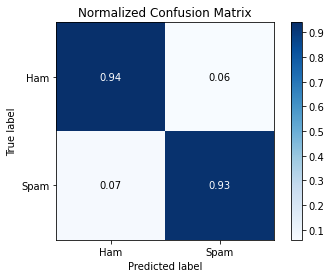

In [36]:
DT = DecisionTreeClassifier()
DT.fit(x_train_df, train_set.label)
predicted_values_DT = DT.predict(x_test_df)
print(predicted_values_DT)
accuracy_DT = accuracy_score(test_set.label, predicted_values_DT)
predictions['Decision Tree learning'] = accuracy_DT * 100
print("\nThe accuracy of Decision Tree learning is {}%".format(accuracy_DT * 100))
confusion_matrix_DT = confusion_matrix(test_set.label, predicted_values_DT)
print("\n", confusion_matrix_DT)
skplt.metrics.plot_confusion_matrix(test_set.label, predicted_values_DT, normalize = True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


['Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham'
 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham'
 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham'
 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham'
 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham'
 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham'
 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham'
 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham'
 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham'
 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham'
 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham'
 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham'
 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham'
 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'H

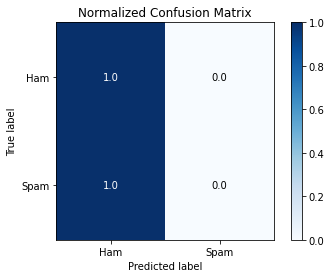

In [37]:
SVM = svm.SVC()
SVM.fit(x_train_df, train_set.label)
predicted_values_SVM = SVM.predict(x_test_df)
print(predicted_values_SVM)
accuracy_SVM = accuracy_score(test_set.label, predicted_values_SVM)
predictions['Support Vector Machine (SVM)'] = accuracy_SVM * 100
print("\nThe accuracy of Support Vector Machine (SVM) is {}%".format(accuracy_SVM * 100))
confusion_matrix_SVM = confusion_matrix(test_set.label, predicted_values_SVM)
print("\n", confusion_matrix_SVM)
skplt.metrics.plot_confusion_matrix(test_set.label, predicted_values_SVM, normalize = True)
plt.show()

['Ham' 'Ham' 'Spam' 'Spam' 'Spam' 'Ham' 'Spam' 'Spam' 'Ham' 'Spam' 'Ham'
 'Ham' 'Spam' 'Ham' 'Ham' 'Ham' 'Spam' 'Ham' 'Spam' 'Ham' 'Ham' 'Spam'
 'Spam' 'Ham' 'Spam' 'Ham' 'Ham' 'Ham' 'Ham' 'Spam' 'Spam' 'Ham' 'Ham'
 'Ham' 'Spam' 'Ham' 'Spam' 'Ham' 'Ham' 'Spam' 'Ham' 'Spam' 'Spam' 'Spam'
 'Ham' 'Spam' 'Spam' 'Ham' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Ham' 'Ham'
 'Ham' 'Spam' 'Spam' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Spam' 'Ham' 'Spam'
 'Spam' 'Ham' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Ham'
 'Spam' 'Spam' 'Ham' 'Spam' 'Spam' 'Spam' 'Ham' 'Spam' 'Ham' 'Ham' 'Spam'
 'Ham' 'Spam' 'Ham' 'Spam' 'Spam' 'Spam' 'Spam' 'Ham' 'Ham' 'Ham' 'Ham'
 'Spam' 'Spam' 'Spam' 'Spam' 'Ham' 'Spam' 'Spam' 'Spam' 'Ham' 'Spam' 'Ham'
 'Ham' 'Spam' 'Ham' 'Ham' 'Ham' 'Spam' 'Ham' 'Ham' 'Spam' 'Spam' 'Ham'
 'Spam' 'Ham' 'Ham' 'Spam' 'Ham' 'Spam' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham'
 'Spam' 'Spam' 'Spam' 'Ham' 'Spam' 'Spam' 'Spam' 'Ham' 'Spam' 'Spam' 'Ham'
 'Spam' 'Spam' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Ham' 'Spam' 'Sp

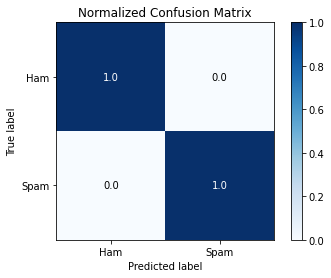

In [40]:
RF = RandomForestClassifier(n_estimators = 100, oob_score = True, random_state = 123456)
RF.fit(x_train_df, train_set.label)
predicted_values_RF = RF.predict(x_test_df)
print(predicted_values_RF)
accuracy_RF = accuracy_score(test_set.label, predicted_values_RF)
predictions['Random Forest'] = accuracy_RF * 100
print("\nThe accuracy of Random Forest is {}%".format(accuracy_RF * 100))
confusion_matrix_RF = confusion_matrix(test_set.label, predicted_values_RF)
print("\n", confusion_matrix_RF)
skplt.metrics.plot_confusion_matrix(test_set.label, predicted_values_RF, normalize = True)
plt.show()

,Algorithms,Percentage
0,K-Nearest Neighbors algorithm,50.360750
1,Decision Tree learning,93.795094
2,Support Vector Machine (SVM),49.639250
3,Random Forest,100.000000


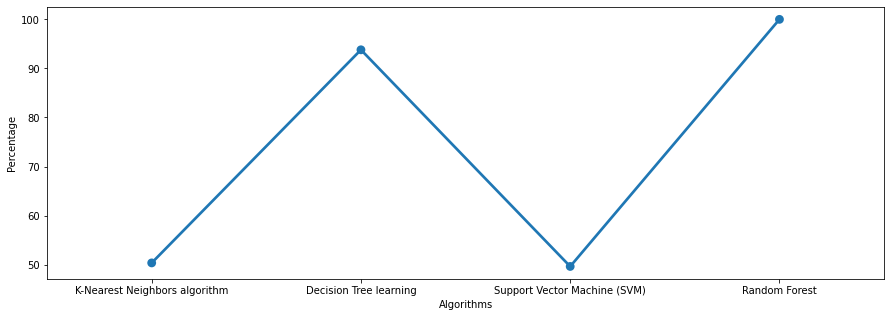

In [41]:
fig, (ax1) = plt.subplots(ncols = 1, sharey = True,figsize = (15,5))
df = pd.DataFrame(list(predictions.items()),columns = ['Algorithms','Percentage'])
display(df)
sns.pointplot(x = "Algorithms", y = "Percentage", data = df,ax = ax1);